# Bitcoin-Ethereum Cointegration Analysis using VECM

The propose of this project is to practice my time-series modelling skills which I have learnt in Time Series Econometrics course (but using R). In this project, I used VECM to model bitcoin and ethereum price after the COVID-19 hits the economy to see whether the cointegration among two most well-known cryptocurrency still holds.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# For modelling
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import *

## Data Scraping and Preprocessing

In [14]:
btc = yf.Ticker('BTC-USD').history(period='3y')
eth = yf.Ticker('ETH-USD').history(period='3y')

df = pd.DataFrame({'btc':btc.Close,'eth':eth.Close})
df = df.asfreq('D')
df.head()

,btc,eth
Date,,
2019-09-05,10575.533203,174.217133
2019-09-06,10353.302734,169.956177
2019-09-07,10517.254883,178.262619
2019-09-08,10441.276367,181.355530
2019-09-09,10334.974609,181.149460


array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

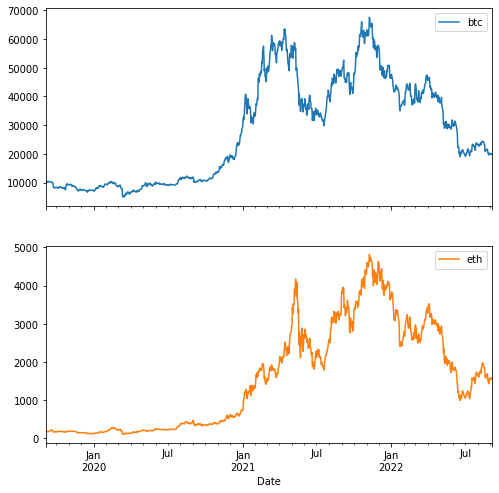

In [15]:
# Plot untransformed data
df.plot(subplots=True,layout=(2,1),figsize=(8,8))

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

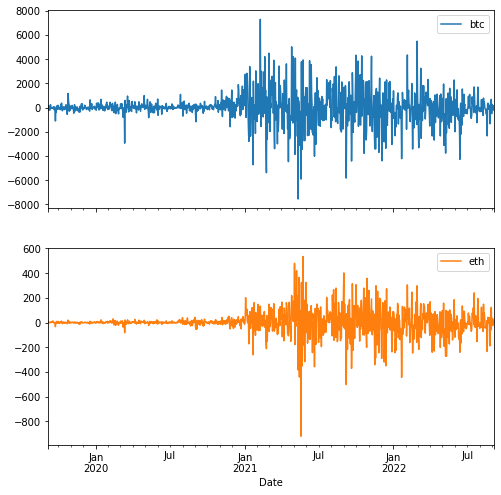

In [81]:
# Plot differenced series
df.diff().plot(subplots=True,layout=(2,1),figsize=(8,8))

To this point, we can see that both original price series are not stationary. However, after differencing, they becomes stationary. If cointegration exist, VECM will be a great choice to model them.

## Model Selection and Cointegration Test

In [83]:
lag_order = select_order(df,10,seasons=7,deterministic='ci',)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,22.60,22.69*,6.521e+09,22.63*
1,22.59,22.70,6.497e+09,22.64
2,22.59,22.72,6.464e+09,22.64
3,22.59,22.74,6.481e+09,22.65
4,22.59,22.76,6.487e+09,22.66
5,22.58,22.77,6.425e+09,22.65
6,22.57,22.78,6.367e+09,22.65
7,22.57*,22.79,6.329e+09*,22.65
8,22.57,22.81,6.359e+09,22.66
9,22.57,22.83,6.331e+09,22.67


In [82]:
rank = select_coint_rank(df[['btc','eth']],0,7,method='trace')
rank.summary()

r_0,r_1,test statistic,critical value
0,2,16.26,15.49
1,2,3.390,3.841


The results from these test implies that cointegration among them do exist and VECM(7) would be the best choice for us. We will continue fitting the model with 7 lags getting these results...

In [45]:
model = VECM(df, deterministic="ci", seasons=7,
             k_ar_diff=lag_order.aic, 
             coint_rank=rank.rank)

vecm = model.fit()

In [46]:
vecm.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,-223.8097,140.733,-1.590,0.112,-499.642,52.022
season2,-128.1759,140.522,-0.912,0.362,-403.595,147.243
season3,-105.0515,140.432,-0.748,0.454,-380.294,170.191
season4,-93.5725,140.475,-0.666,0.505,-368.899,181.754
season5,-90.3767,140.593,-0.643,0.520,-365.933,185.180
season6,-137.8377,140.715,-0.980,0.327,-413.635,137.959
L1.btc,0.0720,0.047,1.529,0.126,-0.020,0.164
L1.eth,-1.5089,0.604,-2.498,0.013,-2.693,-0.325
L2.btc,-0.0395,0.047,-0.837,0.402,-0.132,0.053
L2.eth,0.4045,0.603,0.671,0.502,-0.777,1.586


## Forecasting

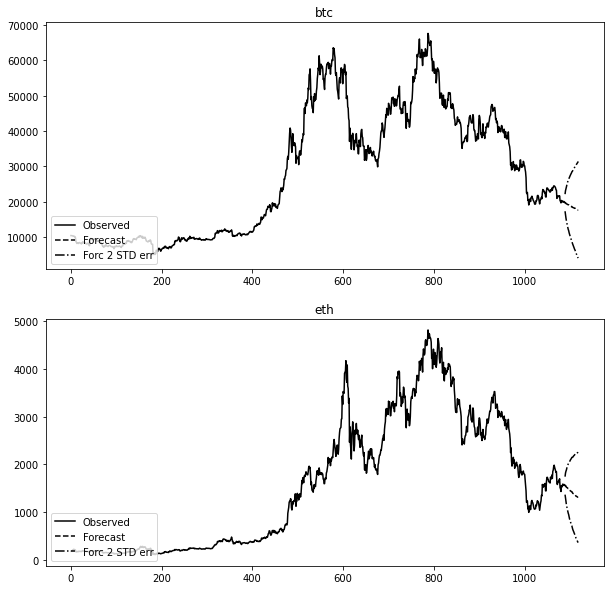

In [49]:
vecm.plot_forecast(steps=30)

## Model Evaluation

### Granger Causality Test
This test checks whether one variable granger causes another variable. If the null hypothesis is rejected, we have enough evidence to ensure that granger causality holds

In [58]:
g1 = vecm.test_granger_causality(caused="eth", signif=0.05)
g2 = vecm.test_granger_causality(caused="btc", signif=0.05)

display(g1.summary())
display(g2.summary())

Test statistic,Critical value,p-value,df
4.280,1.943,0.000,"(8, 2126)"


Test statistic,Critical value,p-value,df
3.907,1.943,0.000,"(8, 2126)"


### Instantaneous Causality Test
This test checks whether one variable instantaenously causes another variable. If the null hypothesis is rejected, we have enough evidence to ensure that instantaneous causality holds

In [60]:
i1 = vecm.test_inst_causality(causing="eth", signif=0.05)
i2 = vecm.test_inst_causality(causing="btc", signif=0.05)

display(i1.summary())
display(i2.summary())

Test statistic,Critical value,p-value,df
403.7,3.841,0.000,1


Test statistic,Critical value,p-value,df
403.7,3.841,0.000,1


We can see from the results that all tests got p-values lower than 0.05, this implies that both variables do effect each other in both granger and intantaneous ways. These results also matches the result from cointegration test, implying that VECM is the right choice.

### Impulse Response Function

The impulse response function demonstrate how shocks on one variable with affect both itself and other variables over the time horizon and how the shocks are absorbed. The plot shows that when shocks happen regardless which coin, the shock is never absorbed. 

This matches what happens in real world, when shock happens, the price of cryptocurrency do not converge back to the original price. The shocks pushes the price to the new equilibrium instead.

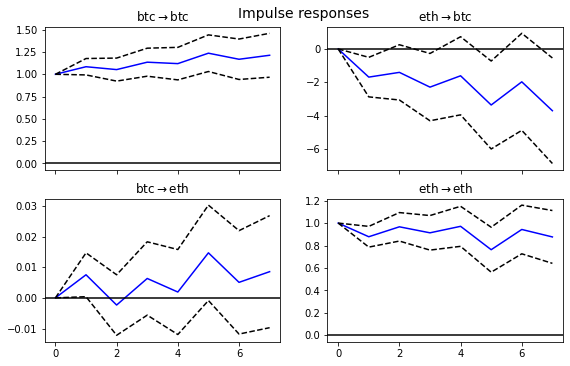

In [67]:
irr = vecm.irf(periods=7)
irr.plot(figsize=(8,5))
plt.show()

### Normality Test

In [68]:
norm_test = vecm.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
5179.,9.488,0.000,4


### White Test

In [78]:
white_test = vecm.test_whiteness(nlags=8)
white_test.summary()

Test statistic,Critical value,p-value,df
4.081,5.991,0.130,2


## Conclusion
The results from this project tell us that cointegration between bitcoin and ethereum still hold strong even after COVID-19 crashes the economy. The price of both coins tends to move in the same say. The impulse response function further illustrate how shocks on both cryptocurrencies never get abosrbed, it tends to push the price of both coins to thee new equilibrium.